# CUHK-STAT3009: Homework 2 - More SVD Models **(due Nov 6)**


## **Q1: Basic Usage of SVD for Rating Prediction**

**Importing the SVD Class**

Download the `SVD` class from our GitHub repository: https://github.com/statmlben/CUHK-STAT3009/blob/main/src/TabRS.py.

**Dataset**

We will use a synthetic dataset to demonstrate the basic usage of SVD for rating prediction. The dataset consists of user ratings for various items, represented by the following DataFrame:
```python
import pandas as pd
data = {
    'user_id': [1, 1, 2, 2, 3, 3, 4, 4, 5, 5],
    'item_id': [1, 2, 1, 3, 1, 3, 2, 3, 2, 3],
    'rating': [5, 3, 4, 2, 1, 3, 4, 5, 2, 3]}
df = pd.DataFrame(data)
```

**Task**

Your task is to train an SVD model with $K = 2$ and $\lambda = 0.001$ using the provided dataset and predict the ratings for the following user-item pairs:

* `user_id` = 2, `item_id` = 2
* `user_id` = 5, `item_id` = 1

Implement the SVD model, train it on the dataset, and provide the predicted ratings for the specified user-item pairs.

> The correctness of the implementation will be evaluated based on the code structure and logic, not on the final evaluation results.

In [ ]:
## Your solution here.
import pandas as pd, numpy as np
data = {
    'user_id': [1, 1, 2, 2, 3, 3, 4, 4, 5, 5],
    'item_id': [1, 2, 1, 3, 1, 3, 2, 3, 2, 3],
    'rating': [5, 3, 4, 2, 1, 3, 4, 5, 2, 3]}
df = pd.DataFrame(data)

user = "statmlben"
repo = "CUHK-STAT3009"
src = "src"
pyfile = "TabRS.py"
#Add a .py file to menu "TabRS.py"

url = f"https://raw.githubusercontent.com/{user}/{repo}/main/{src}/{pyfile}"
!wget --no-cache --backups=1 {url}

# import methods
from TabRS import rmse, SVD

--2025-10-30 13:23:01--  https://raw.githubusercontent.com/statmlben/CUHK-STAT3009/main/src/TabRS.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9001 (8.8K) [text/plain]
Saving to: ‘TabRS.py’

TabRS.py            100%[===================>]   8.79K  --.-KB/s    in 0.001s  

2025-10-30 13:23:01 (10.0 MB/s) - ‘TabRS.py’ saved [9001/9001]



In [ ]:
X_train, y_train = df[['user_id', 'item_id']].values, df['rating'].values
X_test = np.array([[2, 2], [5, 1]])

from sklearn.preprocessing import LabelEncoder
X = np.concatenate([X_train,X_test],axis=0)

## user label encoder
le_user = LabelEncoder()
le_user.fit(X[:,0])

X_train[:,0] = le_user.transform(X_train[:,0])
X_test[:,0] = le_user.transform(X_test[:,0])

## item label encoder
le_item = LabelEncoder()
le_item.fit(X[:,1])

X_train[:,1] = le_item.transform(X_train[:,1])
X_test[:,1] = le_item.transform(X_test[:,1])

## num of users
n_users = len(le_user.classes_)
print(f"n_user: {n_users}")
## num of items
n_items = len(le_item.classes_)
print(f"n_item: {n_items}")

n_user: 5
n_item: 3


In [ ]:
svdRS = SVD(n_users, n_items, K=2, lam=0.001)
svdRS.fit(X_train, y_train)
y_pred = svdRS.predict(X_test)
print(f"Predicted ratings: {y_pred}")

Fitting Reg-SVD: K: 2, lam: 0.00100
RegSVD-ALS: 0; obj: 0.163; rmse:0.390, diff: 9.023
RegSVD-ALS: 1; obj: 0.015; rmse:0.063, diff: 0.148
RegSVD-ALS: 2; obj: 0.011; rmse:0.021, diff: 0.004
RegSVD-ALS: 3; obj: 0.010; rmse:0.016, diff: 0.001
RegSVD-ALS: 4; obj: 0.010; rmse:0.013, diff: 0.000
RegSVD-ALS: 5; obj: 0.009; rmse:0.012, diff: 0.000
RegSVD-ALS: 6; obj: 0.009; rmse:0.010, diff: 0.000
RegSVD-ALS: 7; obj: 0.009; rmse:0.010, diff: 0.000
RegSVD-ALS: 8; obj: 0.009; rmse:0.009, diff: 0.000
RegSVD-ALS: 9; obj: 0.009; rmse:0.008, diff: 0.000
Predicted ratings: [1.40208302 2.78049825]


## **Q2: Lasso-SVD Recommender Systems**

**Data**

In this task, you will implement a user-item average based recommender system using the Netflix dataset from the CUHK-STAT3009 GitHub repository.

```python
import numpy as np
import pandas as pd

# Load the Netflix dataset from the CUHK-STAT3009 GitHub repository
# Repository link: https://github.com/statmlben/CUHK-STAT3009/tree/main/dataset/netflix

train = pd.read_csv('https://raw.githubusercontent.com/statmlben/CUHK-STAT3009/main/dataset/netflix/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/statmlben/CUHK-STAT3009/main/dataset/netflix/test.csv')

# Convert DataFrame to NumPy arrays
```

**Lasso Regression**

Given a dataset of feature-vectors $\mathbf{x}_i$ and corresponding ground truth scores $y_i$, Lasso regression seeks a sparse solution by minimizing the following objective function:

$$\text{argmin}_{\mathbf{\beta}} \ \frac{1}{n} \sum_{i=1}^n ( y_i - \mathbf{\beta}^T \mathbf{x}_i )^2 + \lambda \| \mathbf{\beta} \|_1, \quad \text{where } \| \mathbf{\beta} \|_1 = \sum_{j=1}^p |\beta_j|$$

This can be efficiently solved using `sklearn.linear_model.Lasso` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso)).

### **Task: Lasso Matrix Factorization (Lasso_SVD)**

**Objective**

Implement a Lasso_SVD recommender system by solving the following optimization problem:

$$\boxed{(\widehat{\mathbf P}, \widehat{\mathbf Q}) = \text{argmin}_{\mathbf{P}, \mathbf{Q} } \frac{1}{|\Omega|} \sum_{(u,i) \in \Omega} ( r_{ui} - \mathbf{p}^\intercal_u \mathbf{q}_i  )^2 + \lambda \big(  \sum_{u=1}^n \|\mathbf{p}_u\|_1 + \sum_{i=1}^m \|\mathbf{q}_i\|_1 \big)}$$

**Implementation**

Create a class `Lasso_SVD` with two methods:

1. `Lasso_SVD.fit`: Fit the parameters $\mathbf{P}$ and $\mathbf{Q}$ by solving the optimization problem above using Lasso regression.
2. `Lasso_SVD.predict`: Predict ratings using the fitted parameters: $\widehat{r}_{ui} = \widehat{\mathbf{p}}^T_u \widehat{\mathbf{q}}_i$

**Hint**: Use Alternative Least Square (ALS) logic, where each subproblem is a Lasso regression that can be solved using `sklearn.linear_model.Lasso` (previously, we use `sklearn.linear_model.Ridge`).

**Evaluation**

Print the Root Mean Squared Error (RMSE) for the testing data using the following hyperparameters:

* $(\lambda = 0.1, K = 3)$
* $(\lambda = 0.3, K = 5)$

> Implement the `Lasso_SVD` class with the required methods. The correctness of the implementation will be evaluated based on the code structure and logic, not on the final evaluation results.

In [ ]:
## Your solution here
import numpy as np
import pandas as pd

# Load the Netflix dataset from the CUHK-STAT3009 GitHub repository
# Repository link: https://github.com/statmlben/CUHK-STAT3009/tree/main/dataset/netflix

train = pd.read_csv('https://raw.githubusercontent.com/statmlben/CUHK-STAT3009/main/dataset/netflix/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/statmlben/CUHK-STAT3009/main/dataset/netflix/test.csv')

# Convert DataFrame to NumPy arrays
X_train, y_train = train[['user_id', 'movie_id']].values, train['rating'].values
X_test, y_test = test[['user_id', 'movie_id']].values, test['rating'].values

n_users = len(set(X_train[:,0]).union(set(X_test[:,0])))
n_items = len(set(X_train[:,1]).union(set(X_test[:,1])))

## num of users
print(f"n_user: {n_users}")
## num of items
print(f"n_item: {n_items}")

n_user: 2000
n_item: 3568


In [ ]:
train.describe()


,movie_id,user_id,rating
count,51161.000000,51161.000000,51161.000000
mean,1825.843260,1039.837181,3.621157
std,1034.273845,584.743690,1.087865
min,0.000000,0.000000,1.000000
25%,942.000000,549.000000,3.000000
50%,1846.000000,1047.000000,4.000000
75%,2725.000000,1552.000000,4.000000
max,3567.000000,1999.000000,5.000000


In [ ]:
test.describe()

,movie_id,user_id,rating
count,51161.000000,51161.000000,51161.000000
mean,1828.415590,1040.930044,3.628174
std,1027.239358,584.465198,1.085477
min,0.000000,0.000000,1.000000
25%,961.000000,552.000000,3.000000
50%,1844.000000,1051.000000,4.000000
75%,2720.000000,1542.000000,4.000000
max,3567.000000,1999.000000,5.000000


In [ ]:
from sklearn.base import BaseEstimator
from sklearn.linear_model import Lasso
import warnings

class Lasso_SVD(BaseEstimator):
    def __init__(self, n_users, n_items, K=3, lam=0.1, iterNum=10, verbose=True):
        self.n_users = n_users
        self.n_items = n_items

        self.K = K
        self.lam = lam
        self.iterNum = iterNum
        self.verbose = verbose

        self.P = np.random.randn(self.n_users, self.K)
        self.Q = np.random.randn(self.n_items, self.K)

    def fit(self, X, y):

        # --- Build user-item mappings ---
        self.user_ratings = [[] for _ in range(self.n_users)]
        self.item_ratings = [[] for _ in range(self.n_items)]

        for idx, (u, i) in enumerate(X):
            self.user_ratings[u].append((i, y[idx]))
            self.item_ratings[i].append((u, y[idx]))

        # Convert lists to arrays for faster indexing
        self.user_ratings_arr = []
        for u in range(self.n_users):
            if self.user_ratings[u]:
                arr = np.array(self.user_ratings[u])
                self.user_ratings_arr.append((arr[:, 0].astype(int), arr[:, 1]))
            else:
                self.user_ratings_arr.append((np.array([]), np.array([])))

        self.item_ratings_arr = []
        for i in range(self.n_items):
            if self.item_ratings[i]:
                arr = np.array(self.item_ratings[i])
                self.item_ratings_arr.append((arr[:, 0].astype(int), arr[:, 1]))
            else:
                self.item_ratings_arr.append((np.array([]), np.array([])))

        # warning filter
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=UserWarning)

            # ALS
            for it in range(self.iterNum):

                # --- Update user latent factors ---
                for u in range(self.n_users):
                    items, ratings_u = self.user_ratings_arr[u]

                    if len(items) == 0:
                        self.P[u] = np.zeros(self.K)

                    else:
                        # Lasso regression
                        clf = Lasso(alpha=self.lam / 2, fit_intercept=False, max_iter=5000, tol=1e-4, selection='cyclic', random_state=0)

                        X_lasso = self.Q[items]
                        Y_lasso = ratings_u

                        clf.fit(X_lasso, Y_lasso)   # fitting

                        self.P[u] = clf.coef_       # coefficient of Lasso

                # --- Update item latent factors ---
                for i in range(self.n_items):
                    users, ratings_i = self.item_ratings_arr[i]

                    if len(users) == 0:
                        self.Q[i] = np.zeros(self.K)

                    else:
                        # Lasso regression
                        clf = Lasso(alpha=self.lam / 2, fit_intercept=False, max_iter=5000, tol=1e-4, selection='cyclic', random_state=0)

                        X_lasso = self.P[users]
                        Y_lasso = ratings_i

                        clf.fit(X_lasso, Y_lasso)   # fitting

                        self.Q[i] = clf.coef_       # coefficient of Lasso

                # --- Compute diagnostics ---
                if self.verbose:
                    Y_pred = self.predict(X)
                    rmse = np.sqrt(np.mean((y - Y_pred) ** 2))
                    objective = (np.sum((y - Y_pred) ** 2) / len(X) + self.lam * (np.sum(np.abs(self.P)) + np.sum(np.abs(self.Q))))
                    print(f"Iteration {it+1}: RMSE = {rmse:.4f}, Objective = {objective:.4f}")

        return self

    def predict(self, X):
        Y_pred = np.empty(len(X))

        for idx, (u, i) in enumerate(X):
            Y_pred[idx] = np.clip(np.dot(self.P[u], self.Q[i]), 1, 5)

        return Y_pred

In [ ]:
from sklearn.metrics import root_mean_squared_error as rmse
# Run with lam = 0.1, K = 3
model1 = Lasso_SVD(n_users,
                   n_items,
                   lam=0.1,
                   K=3)

model1.fit(X_train, y_train)

pred1 = model1.predict(X=X_test)

print(f"RMSE: {rmse(y_test,pred1)}")

# Run with lam = 0.3, K = 5
model2 = Lasso_SVD(n_users,
                   n_items,
                   lam=0.3,
                   K=5)

model2.fit(X_train, y_train)

pred2 = model2.predict(X=X_test)

print(f"RMSE: {rmse(y_test,pred2)}")

Iteration 1: RMSE = 2.5477, Objective = 3743.6848
Iteration 2: RMSE = 2.1710, Objective = 3411.7147
Iteration 3: RMSE = 1.4286, Objective = 2574.8927
Iteration 4: RMSE = 0.9717, Objective = 1876.7350
Iteration 5: RMSE = 0.8396, Objective = 1605.2088
Iteration 6: RMSE = 0.8050, Objective = 1510.8481
Iteration 7: RMSE = 0.7923, Objective = 1473.6578
Iteration 8: RMSE = 0.7863, Objective = 1453.5341
Iteration 9: RMSE = 0.7824, Objective = 1443.9650
Iteration 10: RMSE = 0.7798, Objective = 1436.0999
RMSE: 1.0584430088347485
Iteration 1: RMSE = 2.4328, Objective = 8488.1872
Iteration 2: RMSE = 1.2177, Objective = 6354.8345
Iteration 3: RMSE = 0.8847, Objective = 4921.2482
Iteration 4: RMSE = 0.8452, Objective = 4413.6203
Iteration 5: RMSE = 0.8458, Objective = 4062.1838
Iteration 6: RMSE = 0.8512, Objective = 3681.8591
Iteration 7: RMSE = 0.8592, Objective = 3381.4933
Iteration 8: RMSE = 0.8703, Objective = 3179.0575
Iteration 9: RMSE = 0.8744, Objective = 3049.8964
Iteration 10: RMSE = 0.8

## **Q3: Kaggle Submission by Neural Networks**

**Task**

- Create an arbitrary Neural Network with Dense layers and Make a Submission to the Kaggle Competition: [House Prices - Advanced Regression Techniques](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)

- Paste the submission results screenshot into this Jupyter Notebook.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from tensorflow import keras

# Load data
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

# Store IDs for submission
test_ids = test['Id']

# Prepare features and target
y_train = train['SalePrice']
train = train.drop(['SalePrice', 'Id'], axis=1)
test = test.drop('Id', axis=1)

# Combine train and test for consistent preprocessing
all_data = pd.concat([train, test], axis=0)

# Handle missing values
numerical_cols = all_data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = all_data.select_dtypes(include=['object']).columns

# Impute numerical columns
num_imputer = SimpleImputer(strategy='median')
all_data[numerical_cols] = num_imputer.fit_transform(all_data[numerical_cols])

# Impute categorical columns
cat_imputer = SimpleImputer(strategy='most_frequent')
all_data[categorical_cols] = cat_imputer.fit_transform(all_data[categorical_cols])

# Encode categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    all_data[col] = le.fit_transform(all_data[col].astype(str))
    label_encoders[col] = le

# Split back into train and test
X_train = all_data.iloc[:len(train)]
X_test = all_data.iloc[len(train):]

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Scale target variable
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()

print(f"Training data shape: {X_train_scaled.shape}")
print(f"Test data shape: {X_test_scaled.shape}")

# Build neural network
model = keras.Sequential([
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1)
])

# Custom RMSE metric
def rmse(y_true, y_pred):
    return keras.backend.sqrt(keras.backend.mean(keras.backend.square(y_pred - y_true)))

# Compile model
model.compile(
    optimizer=keras.optimizers.SGD(1e-4),
    loss='mse',
    metrics=[rmse, 'mae']
)

# Train model (no callbacks)
print("Training model...")
history = model.fit(
    X_train_scaled,
    y_train_scaled,
    batch_size=32,
    epochs=200,        # Train for full 200 epochs
    validation_split=0.2,
    verbose=1
)

# Plot training history
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(history.history['rmse'], label='Training RMSE')
plt.plot(history.history['val_rmse'], label='Validation RMSE')
plt.title('RMSE')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

# Make predictions
y_pred_scaled = model.predict(X_test_scaled)
y_pred = y_scaler.inverse_transform(y_pred_scaled).flatten()

# Create submission file
submission = pd.DataFrame({
    'Id': test_ids,
    'SalePrice': y_pred
})

submission.to_csv('submission.csv', index=False)
print("Submission file saved as submission.csv")


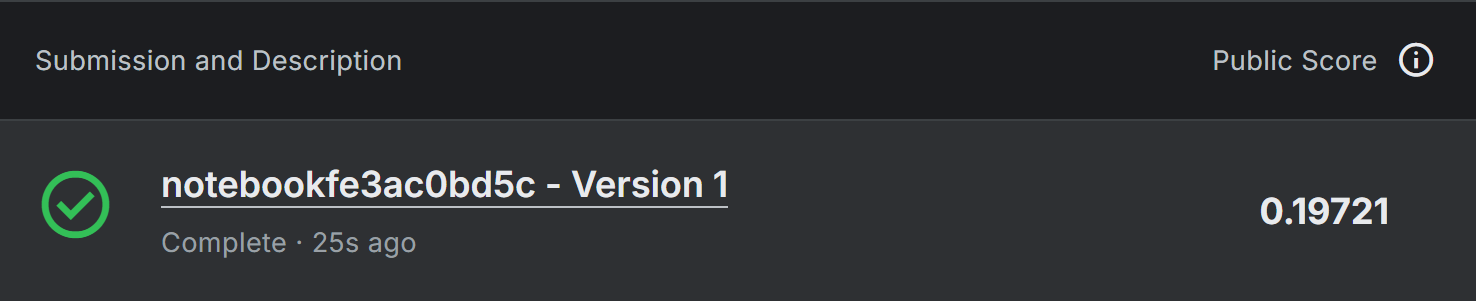

## **Q4 (Bonus): Parallel Alternating Least Squares (ALS) for Matrix Factorization**


**Background**

Recall the item and user updates for `SVD` based on ALS:

$$\mathbf{q}^{(l+1)}_i = \left(\sum_{u \in \mathcal{U}_i} \mathbf{p}^{(l)}_u (\mathbf{p}^{(l)}_u)^T + \lambda |\Omega| \mathbf{I}\right)^{-1} \sum_{u \in \mathcal{U}_i} r_{ui} \mathbf{p}^{(l)}_u$$

$$\mathbf{p}^{(l+1)}_u = \left(\sum_{i \in \mathcal{I}_u} \mathbf{q}^{(l+1)}_i (\mathbf{q}^{(l+1)}_i)^\intercal + \lambda |\Omega| \mathbf{I}\right)^{-1} \sum_{i \in \mathcal{I}_u} r_{ui} \mathbf{q}^{(l+1)}_i$$

The key observation is that the updates for user-$u$ and item-$i$ are independent of other users and items, respectively. Therefore, they can be performed in parallel.

Suppose you have 100 users to update, the basic ALS updates user 1, user 2, ..., user 100 sequentially in a loop. Now, suppose you have 100 CPUs, the parallel ALS can update 100 users simultaneously by distributing each user to a different CPU, significantly reducing the computation time.

**Tasks**

1. **Parallelize the `SVD.fit` method**: Revise the `SVD.fit` method (available in [repo](https://github.com/statmlben/CUHK-STAT3009/blob/main/src/TabRS.py)) to allow parallel updating of $\mathbf{p}_u$ and $\mathbf{q}_i$ using Python libraries such as [multiprocessing](https://docs.python.org/3/library/multiprocessing.html) or [pymp](https://github.com/classner/pymp).
2. **Compare computation times**: Compare the computation time for `SVD.fit` with and without parallel computing using the `%%time` magic command (see [ref](https://stackoverflow.com/questions/32565829/simple-way-to-measure-cell-execution-time-in-ipython-notebook)).

In [ ]:
# check number of CPUs in your PC/Node
!lscpu

Architecture:                x86_64
  CPU op-mode(s):            32-bit, 64-bit
  Address sizes:             46 bits physical, 48 bits virtual
  Byte Order:                Little Endian
CPU(s):                      2
  On-line CPU(s) list:       0,1
Vendor ID:                   GenuineIntel
  Model name:                Intel(R) Xeon(R) CPU @ 2.20GHz
    CPU family:              6
    Model:                   79
    Thread(s) per core:      2
    Core(s) per socket:      1
    Socket(s):               1
    Stepping:                0
    BogoMIPS:                4399.99
    Flags:                   fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pg
                             e mca cmov pat pse36 clflush mmx fxsr sse sse2 ss h
                             t syscall nx pdpe1gb rdtscp lm constant_tsc rep_goo
                             d nopl xtopology nonstop_tsc cpuid tsc_known_freq p
                             ni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2ap
                   

In [ ]:
## Your solution here
import numpy as np
import pandas as pd

# Load the Netflix dataset from the CUHK-STAT3009 GitHub repository
# Repository link: https://github.com/statmlben/CUHK-STAT3009/tree/main/dataset/netflix

train = pd.read_csv('https://raw.githubusercontent.com/statmlben/CUHK-STAT3009/main/dataset/netflix/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/statmlben/CUHK-STAT3009/main/dataset/netflix/test.csv')

# Convert DataFrame to NumPy arrays
X_train, y_train = train[['user_id', 'movie_id']].values, train['rating'].values
X_test, y_test = test[['user_id', 'movie_id']].values, test['rating'].values

n_users = len(set(X_train[:,0]).union(set(X_test[:,0])))
n_items = len(set(X_train[:,1]).union(set(X_test[:,1])))

## num of users
print(f"n_user: {n_users}")
## num of items
print(f"n_item: {n_items}")

n_user: 2000
n_item: 3568


In [ ]:
import numpy as np
from sklearn.base import BaseEstimator
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import multiprocessing as mp
from functools import partial
import time


class SVD(BaseEstimator):
    def __init__(self, n_users, n_items, lam=.001, K=10, iterNum=10,
                 tol=1e-4, verbose=1, n_jobs=-1):
        self.mu = 0.0
        self.a = np.zeros(n_users)  # user bias
        self.b = np.zeros(n_items)  # item bias
        self.P = np.random.randn(n_users, K)  # user latent factors
        self.Q = np.random.randn(n_items, K)  # item latent factors
        self.n_users = n_users
        self.n_items = n_items
        self.K = K
        self.lam = lam
        self.iterNum = iterNum
        self.tol = tol
        self.verbose = verbose
        self.n_jobs = mp.cpu_count() if n_jobs == -1 else n_jobs

    # ---------- Helper functions for parallel updates ----------
    def _update_item_params(self, item_id, X, y):
        index_item_tmp = self.index_item[item_id]
        if len(index_item_tmp) == 0:
            return item_id, 0.0, np.zeros(self.K)

        y_tmp = y[index_item_tmp]
        X_tmp = X[index_item_tmp]
        U_tmp = X_tmp[:, 0].astype(int)

        # Update item bias
        pred_tmp = self.mu + self.a[U_tmp] + self.b[item_id] + np.sum(self.P[U_tmp] * self.Q[item_id], axis=1)
        b_new = np.mean(y_tmp - pred_tmp + self.b[item_id])

        # Update item latent factors
        res_tmp = y_tmp - self.mu - b_new - self.a[U_tmp]
        P_tmp = self.P[U_tmp]

        if len(res_tmp) > 0:
            clf = Ridge(alpha=self.lam * len(X), fit_intercept=False)
            clf.fit(P_tmp, res_tmp)
            Q_new = clf.coef_
        else:
            Q_new = np.zeros(self.K)

        return item_id, b_new, Q_new

    def _update_user_params(self, user_id, X, y):
        index_user_tmp = self.index_user[user_id]
        if len(index_user_tmp) == 0:
            return user_id, 0.0, np.zeros(self.K)

        y_tmp = y[index_user_tmp]
        X_tmp = X[index_user_tmp]
        I_tmp = X_tmp[:, 1].astype(int)

        # Update user bias
        pred_tmp = self.mu + self.a[user_id] + self.b[I_tmp] + np.sum(self.P[user_id] * self.Q[I_tmp], axis=1)
        a_new = np.mean(y_tmp - pred_tmp + self.a[user_id])

        # Update user latent factors
        res_tmp = y_tmp - self.mu - self.b[I_tmp] - a_new
        Q_tmp = self.Q[I_tmp]

        if len(res_tmp) > 0:
            clf = Ridge(alpha=self.lam * len(X), fit_intercept=False)
            clf.fit(Q_tmp, res_tmp)
            P_new = clf.coef_
        else:
            P_new = np.zeros(self.K)

        return user_id, a_new, P_new

    # ---------- Main fit method ----------
    def fit(self, X, y, parallel=False):
        n_obs = len(X)
        if self.verbose:
            mode = "Parallel" if parallel else "Sequential"
            print(f"Fitting Reg-SVD ({mode}): K={self.K}, λ={self.lam:.5f}, n_jobs={self.n_jobs}")

        # Precompute indices
        self.index_item = [np.where(X[:, 1] == i)[0] for i in range(self.n_items)]
        self.index_user = [np.where(X[:, 0] == u)[0] for u in range(self.n_users)]

        for l in range(self.iterNum):
            obj_old = self.obj(X, y)

            # Update global bias
            self.mu = np.mean(y - self.predict(X) + self.mu)

            # --- ITEM UPDATE ---
            if parallel:
                with mp.Pool(processes=self.n_jobs) as pool:
                    item_results = pool.map(partial(self._update_item_params, X=X, y=y), range(self.n_items))
                for item_id, b_new, Q_new in item_results:
                    self.b[item_id] = b_new
                    self.Q[item_id, :] = Q_new
            else:
                for i in range(self.n_items):
                    _, b_new, Q_new = self._update_item_params(i, X, y)
                    self.b[i] = b_new
                    self.Q[i, :] = Q_new

            # --- USER UPDATE ---
            if parallel:
                with mp.Pool(processes=self.n_jobs) as pool:
                    user_results = pool.map(partial(self._update_user_params, X=X, y=y), range(self.n_users))
                for user_id, a_new, P_new in user_results:
                    self.a[user_id] = a_new
                    self.P[user_id, :] = P_new
            else:
                for u in range(self.n_users):
                    _, a_new, P_new = self._update_user_params(u, X, y)
                    self.a[u] = a_new
                    self.P[u, :] = P_new

            # --- Diagnostics ---
            obj_new = self.obj(X, y)
            rmse_tmp = np.sqrt(self.mse(X, y))
            diff = abs(obj_old - obj_new)

            if self.verbose:
                print(f"ALS-{mode}: iter={l}, obj={obj_new:.4f}, RMSE={rmse_tmp:.4f}, diff={diff:.6f}")

            if diff < self.tol:
                break

        return self

    # ---------- Utility functions ----------
    def predict(self, X):
        return np.array([
            self.mu + self.a[u] + self.b[i] + np.dot(self.P[u], self.Q[i])
            for u, i in X
        ])

    def mse(self, X, y):
        return np.mean((self.predict(X) - y) ** 2)

    def obj(self, X, y):
        mse_tmp = self.mse(X, y)
        pen_tmp = np.sum(self.P ** 2) + np.sum(self.Q ** 2)
        return mse_tmp + self.lam * pen_tmp


In [ ]:
import time

# --- Sequential Fit ---
print("\n=== Sequential ALS Training ===")
SVD_seq = SVD(n_users, n_items, lam=0.1, K=3, iterNum=10, verbose=1)

start_time = time.time()
SVD_seq.fit(X_train, y_train, parallel=False)
seq_time = time.time() - start_time

print(f"Sequential Training Time: {seq_time:.2f} seconds")

# --- Parallel Fit ---
print("\n=== Parallel ALS Training ===")
SVD_par = SVD(n_users, n_items, lam=0.1, K=3, iterNum=10, verbose=1)

start_time = time.time()
SVD_par.fit(X_train, y_train, parallel=True)
par_time = time.time() - start_time

print(f"Parallel Training Time: {par_time:.2f} seconds")

# --- Summary ---
print("\n=== Summary ===")
print(f"Sequential Time: {seq_time:.2f}s")
print(f"Parallel Time:   {par_time:.2f}s")
print(f"Speedup: {seq_time / par_time:.2f}x faster (approx.)")



=== Sequential ALS Training ===
Fitting Reg-SVD (Sequential): K=3, λ=0.10000, n_jobs=2
ALS-Sequential: iter=0, obj=0.9593, RMSE=0.9790, diff=1722.605909
ALS-Sequential: iter=1, obj=0.7607, RMSE=0.8722, diff=0.198606
ALS-Sequential: iter=2, obj=0.7594, RMSE=0.8714, diff=0.001282
ALS-Sequential: iter=3, obj=0.7593, RMSE=0.8714, diff=0.000103
ALS-Sequential: iter=4, obj=0.7593, RMSE=0.8714, diff=0.000014
Sequential Training Time: 44.50 seconds

=== Parallel ALS Training ===
Fitting Reg-SVD (Parallel): K=3, λ=0.10000, n_jobs=2
ALS-Parallel: iter=0, obj=0.9520, RMSE=0.9753, diff=1704.232162
ALS-Parallel: iter=1, obj=0.7610, RMSE=0.8723, diff=0.191034
ALS-Parallel: iter=2, obj=0.7595, RMSE=0.8715, diff=0.001525
ALS-Parallel: iter=3, obj=0.7593, RMSE=0.8714, diff=0.000127
ALS-Parallel: iter=4, obj=0.7593, RMSE=0.8714, diff=0.000018
Parallel Training Time: 28.00 seconds

=== Summary ===
Sequential Time: 44.50s
Parallel Time:   28.00s
Speedup: 1.59x faster (approx.)
